# Preamble

Goal: In this competition, Instacart is challenging the 
Kaggle community to use this anonymized data on customer 
orders over time to predict which previously purchased 
products will be in a user’s next order. (e.g., we only
care about product a customer has previously ordered)

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [20]:
from code.helpers import load_top_n, _FILES

#### Load the data (save as snippet?)

In [5]:
sneak_peeks = load_top_n(10)

In [6]:
sneak_peeks.keys()

['orders_train',
 'orders_meta',
 'departments',
 'products',
 'orders_prior',
 'aisles',
 'samples_submission']

# Peek at each of the datasets

In [10]:
sneak_peeks['products'].head(1)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19


In [13]:
sneak_peeks['aisles'].head(1)

,aisle_id,aisle
0,1,prepared soups salads


In [11]:
sneak_peeks['departments'].head(1)

,department_id,department
0,1,frozen


In [14]:
sneak_peeks['orders_train'].head(1)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1


In [15]:
sneak_peeks['orders_prior'].head(1)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1


In [16]:
sneak_peeks['orders_meta'].head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN


In [18]:
sneak_peeks['samples_submission'].head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


# Okay - how are the orders split?

Look at order meta data

#### Preamble

In [21]:
order_meta_data = pd.read_csv(_FILES['orders_meta'])

#### Basic counts

In [22]:
order_meta_data.shape

(3421083, 7)

In [32]:
order_meta_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [24]:
order_meta_data['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

#### Orders by user

In [25]:
orders_by_user = order_meta_data.groupby('user_id').size()

In [26]:
orders_by_user.shape

(206209,)

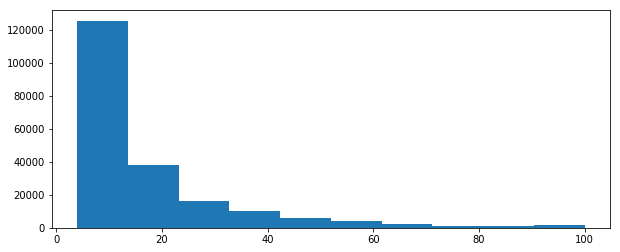

In [29]:
_, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.hist(orders_by_user);

In [30]:
orders_by_user.quantile(np.linspace(0, 1, 21))

0.00      4.0
0.05      4.0
0.10      4.0
0.15      5.0
0.20      5.0
0.25      6.0
0.30      7.0
0.35      7.0
0.40      8.0
0.45      9.0
0.50     10.0
0.55     12.0
0.60     13.0
0.65     15.0
0.70     17.0
0.75     20.0
0.80     24.0
0.85     29.0
0.90     38.0
0.95     52.0
1.00    100.0
dtype: float64

#### Orders by set type and user

Key findings:
1. prior info is available for all customers, but some are train and some are test

In [35]:
orders_by_user_set = order_meta_data.groupby(['user_id', 'eval_set']).size().unstack('eval_set')

In [38]:
orders_by_user_set.head()

eval_set,prior,test,train
user_id,,,
1,10.0,NaN,1.0
2,14.0,NaN,1.0
3,12.0,1.0,NaN
4,5.0,1.0,NaN
5,4.0,NaN,1.0


In [37]:
orders_by_user_set[['test', 'train']].sum(axis=1).value_counts()

1.0    206209
dtype: int64

# Basic code

#### Quick check - can i just load all the data?

In [63]:
orders_prior = pd.read_csv(_FILES['orders_prior'])

In [65]:
_FILES['orders_prior']

'/Users/anthonyliu/Documents/main/instacart/data/order_products__prior.csv'

In [66]:
orders_prior.to_hdf('/Users/anthonyliu/Documents/main/instacart/data/data.hd5', 'orders_prior')

In [67]:
orders_train = pd.read_csv(_FILES['orders_train'])

In [68]:
orders_train.to_hdf('/Users/anthonyliu/Documents/main/instacart/data/data.hd5', 'orders_train')